## Exploratory Data Analysis for Baseball Database

The main purpose is to gain an overview of the dataset. Identify problems in the dataset that need to be corrected. Identify outliers and consider if these are real or erros in the dataset.

The exploratory data analysis (EDA) process will help firm up which dependent variables should be used to investigate independent variables and how the former depends on the latter.

The theme of this investigation is to ask if geographical location has an affect, if where a person was born, where the college was located has an impact on a dependent variable (e.g. Salary of player).

In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ballbase import figures

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [3]:
import Baseball_data_investigation
df = Baseball_data_investigation.main()
df.head()

Processed hall of fame data
There are 250 members of the Hall of Fame

Processed All Star data
aaronha01    25
musiast01    24
mayswi01     24
mantlmi01    20
ripkeca01    19
Name: allstar_count, dtype: int64

Processed Player Awards data
bondsba01    47
willite01    39
dimagjo01    36
musiast01    34
ruthba01     33
Name: award_count, dtype: int64

Processed Salary data
            mean_salary  max_salary  min_salary  \
playerID                                          
aardsda01  1.322821e+06   4500000.0    300000.0   
aasedo01   5.750000e+05    675000.0    400000.0   
abadan01   3.270000e+05    327000.0    327000.0   
abadfe01   7.532800e+05   1250000.0    418000.0   
abbotje01  2.462500e+05    300000.0    175000.0   

           mean_salary_standardized_annually  \
playerID                                       
aardsda01                          -0.440097   
aasedo01                            0.299314   
abadan01                           -0.663649   
abadfe01                    

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,allstar_count,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
aardsda01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aaronha01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aasedo01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abadan01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abbeybe01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Adam\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  result = result.union(other)


In [4]:
columns = list(df.columns.values)
print(columns)

['playerID', 'yearid', 'votedBy', 'ballots', 'needed', 'votes', 'inducted', 'category', 'needed_note', 'allstar_count', 'award_count', 'mean_salary', 'max_salary', 'min_salary', 'mean_salary_standardized_annually', 'max_salary_standardized_annually', 'min_salary_standardized_annually', 'mode_schoolID', 'name_full', 'city', 'state', 'country', 'playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID']


In [5]:
df.isnull().values.any()

True

### Univariate exploratory data analysis

count    1343.000000
mean        4.585257
std         5.603915
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        47.000000
Name: award_count, dtype: float64

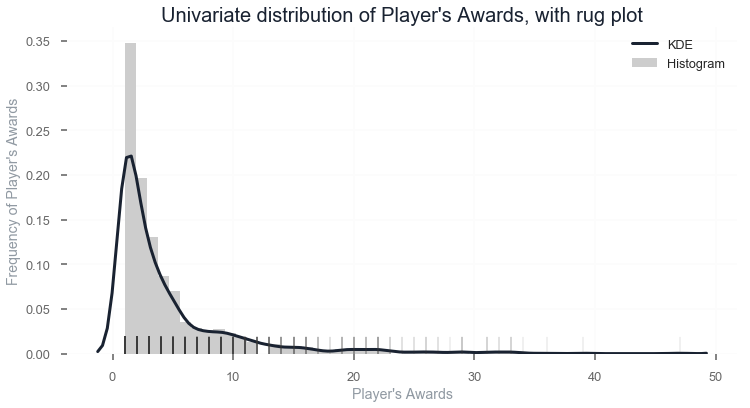

In [6]:
fig_1 = figures.univariate(df['award_count'].dropna(), 'Player\'s Awards')
df['award_count'].dropna().describe()

count    1774.000000
mean        2.901917
std         2.927680
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        25.000000
Name: allstar_count, dtype: float64

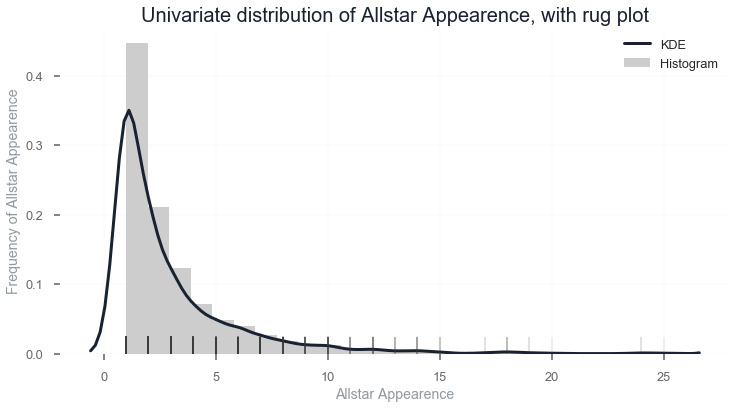

In [7]:
fig_2 = figures.univariate(df['allstar_count'].dropna(), 'Allstar Appearence', bin_n=25)
df['allstar_count'].dropna().describe()

count    5155.000000
mean        0.054906
std         1.097218
min        -1.212567
25%        -0.644390
50%        -0.507863
75%         0.360500
max         7.489766
Name: max_salary_standardized_annually, dtype: float64

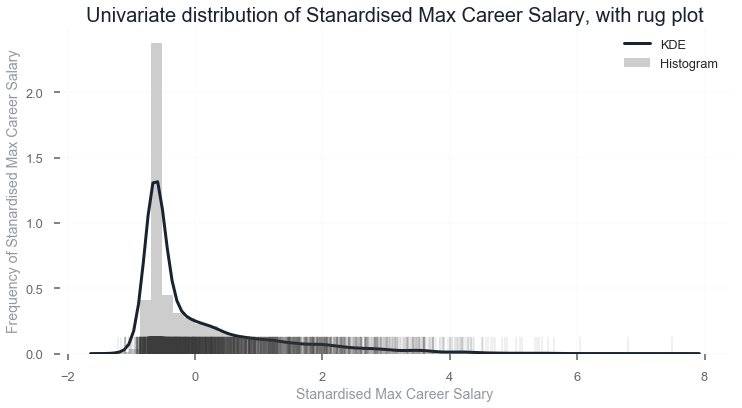

In [8]:
fig_3 = figures.univariate(df['max_salary_standardized_annually'].dropna(), 'Stanardised Max Career Salary', bin_n=None)
df['max_salary_standardized_annually'].dropna().describe()

count    5155.000000
mean       -0.650137
std         0.271276
min        -1.212567
25%        -0.712534
50%        -0.671235
75%        -0.644166
max         3.925495
Name: min_salary_standardized_annually, dtype: float64

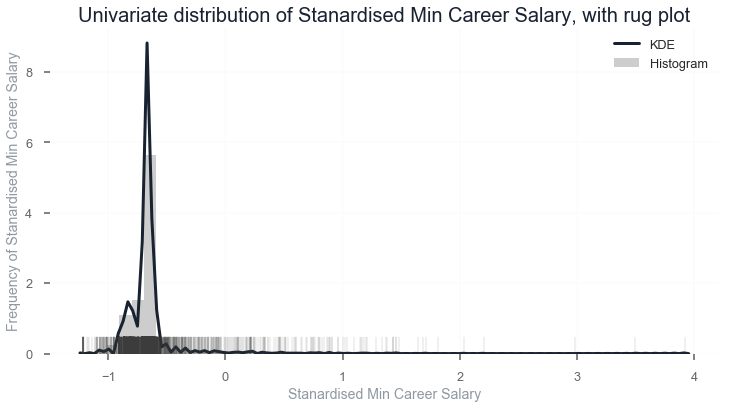

In [9]:
fig_4 = figures.univariate(df['min_salary_standardized_annually'].dropna(), 'Stanardised Min Career Salary', bin_n=None)
df['min_salary_standardized_annually'].dropna().describe()

count    5155.000000
mean       -0.319813
std         0.595574
min        -1.212567
25%        -0.656584
50%        -0.590689
75%        -0.223479
max         4.268085
Name: mean_salary_standardized_annually, dtype: float64

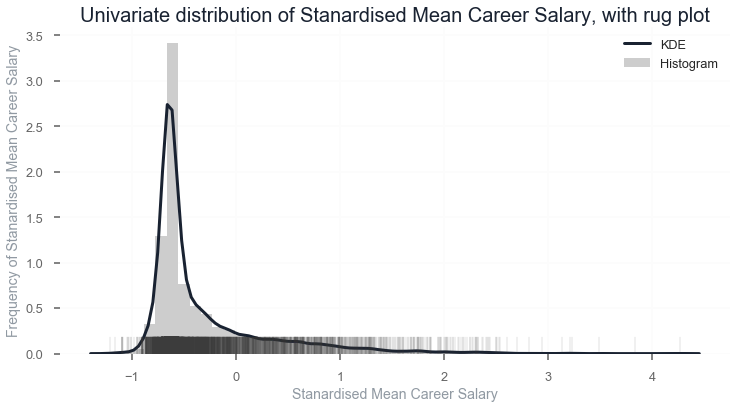

In [10]:
fig_5 = figures.univariate(df['mean_salary_standardized_annually'].dropna(), 'Stanardised Mean Career Salary', bin_n=None)
df['mean_salary_standardized_annually'].dropna().describe()

count    5.155000e+03
mean     1.197197e+06
std      1.884562e+06
min      6.000000e+04
25%      2.688333e+05
50%      5.075000e+05
75%      1.224659e+06
max      2.500000e+07
Name: mean_salary, dtype: float64

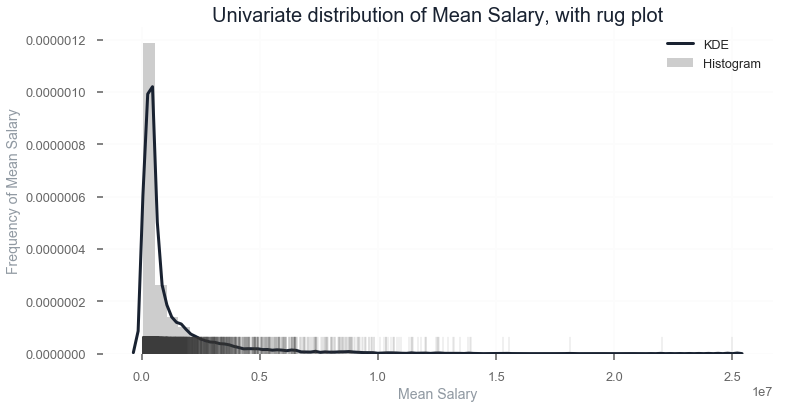

In [11]:
fig_6 = figures.univariate(df['mean_salary'].dropna(), 'Mean Salary', bin_n=None)
df['mean_salary'].dropna().describe()

count    18973.000000
mean      1931.435356
std         41.555514
min       1820.000000
25%       1895.000000
50%       1937.000000
75%       1969.000000
max       1996.000000
Name: birthYear, dtype: float64

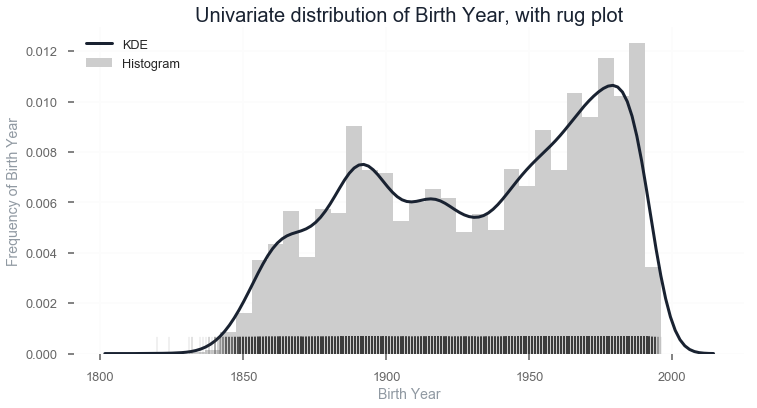

In [12]:
fig_7 = figures.univariate(df['birthYear'].dropna(), 'Birth Year', bin_n=None)
df['birthYear'].dropna().describe()

count    18251.000000
mean       186.375596
std         21.524765
min         65.000000
25%        170.000000
50%        185.000000
75%        200.000000
max        320.000000
Name: weight, dtype: float64

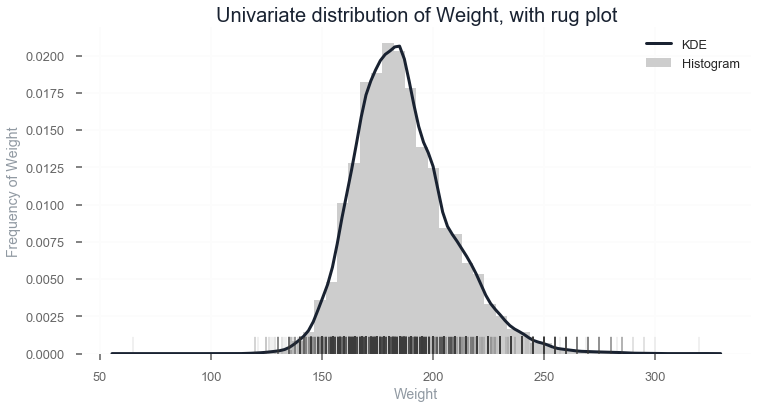

In [ ]:
fig_8 = figures.univariate(df['weight'].dropna(), 'Weight', bin_n=None)
df['weight'].dropna().describe()

In [ ]:
fig_9 = figures.univariate(df['height'].dropna(), 'Height', bin_n=None)
df['height'].dropna().describe()

## Bivariate distributions

In [ ]:
sns.jointplot(x=df['weight'].dropna(), y=df['height'].dropna())

## Categorical data

In [ ]:
f, ax = plt.subplots(figsize=(7, 2))
sns.countplot(y=df['inducted'], color="c");